In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

#**Data Understanding, Cleaning, Visualizations**

## **Load Data**

In [116]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` with 200 entries. There is 0 null values in each column.

In [118]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Insights:**
The average customer is around 39 years old with an annual income of approximately 60,560 dollar and a spending score of 50.

 Age ranges from 18 to 70, income from 15k dollar to 137k dollar, and spending scores from 1 to 99, indicating diverse spending behavior.

 The relatively high standard deviation in both income and spending score suggests significant variation among customers, potentially useful for customer segmentation or clustering analysis.

In [119]:
# rename the Annual Income (k$) and Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Check & Handle Missing Values / Duplicate**

In [120]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [121]:
df.duplicated().sum()

np.int64(0)

## **Drop Unused Attribute**

In [122]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender', 'Age', 'Annual Income', 'Spending Score']]
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## **Exploratory Data Analysis (Visualizations)**

In [123]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()


This 3D scatter plot visualizes customer data, where each point represents an individual. The three axes show Age, Annual Income, and Spending Score. The color gradient (from purple to yellow) indicates the Spending Score level — darker colors represent lower spending scores, while brighter colors indicate higher scores. The plot helps to identify patterns or clusters among customers, such as groups with high income and high spending or low income and low spending, which can be useful for market segmentation.

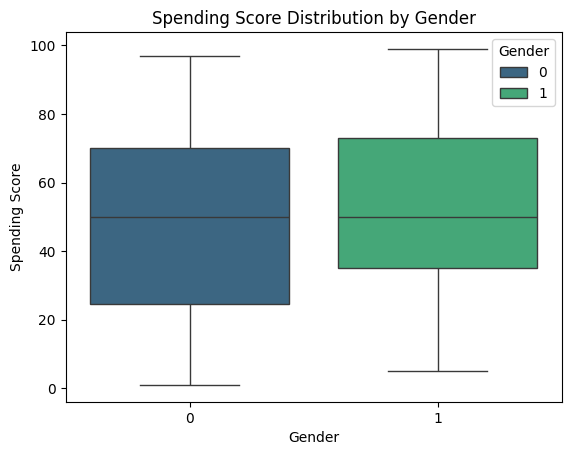

In [155]:
sns.boxplot(x='Gender', y='Spending Score', data=df, palette='viridis', hue='Gender')
plt.title('Spending Score Distribution by Gender')
plt.show()

This boxplot shows the distribution of Spending Scores across two gender categories (0 and 1). Both groups have a wide range of spending scores from near 0 to around 100, indicating variability in spending behavior. The median spending score for gender 0 appears slightly higher than for gender 1, though both distributions have similar spreads and interquartile ranges. Overall, there isn’t a significant difference in spending score distributions between the two genders based on this visualization.

/tmp/ipython-input-3540431093.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



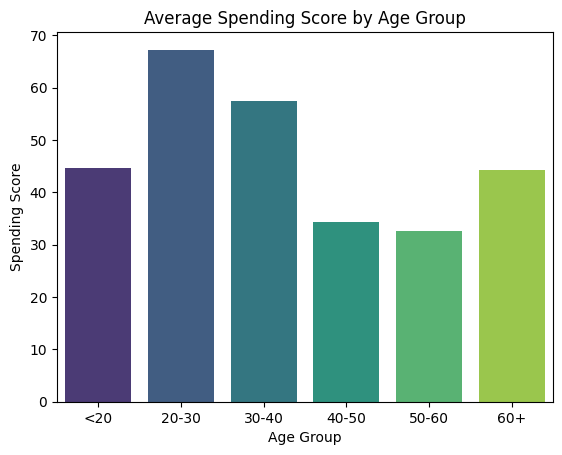

In [158]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70],
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])

avg_scores = df.groupby('Age Group')['Spending Score'].mean().reset_index()

sns.barplot(x='Age Group', y='Spending Score', data=avg_scores, palette='viridis', hue='Age Group')
plt.title('Average Spending Score by Age Group')
plt.show()

The bar chart shows the average spending score across different age groups. Individuals aged 20–30 have the highest spending score, indicating they tend to spend the most on average. This is followed by the 30–40 age group, while those aged 40–60 show a noticeable decline in spending. Interestingly, the spending score rises again among individuals aged 60 and above, suggesting higher spending activity among older consumers compared to middle-aged groups.

# **Data Transformation**

## **Encoding**

In [124]:
from sklearn.preprocessing import OneHotEncoder

# one hot map for nominal attribute encoding
one_hot_map = {
    'Gender': {'Male': 0, 'Female': 1}
}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)

In [125]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## **Scaling**

In [126]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df_sc_scaled.head()

# visualization
fig = px.scatter_3d(
    df_sc_scaled,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Spending Score',  # opsional: warnai berdasarkan Spending Score
    color_continuous_scale='Blues',
    opacity=0.7,
    title='3D Visualization of Scaled Data (Age, Income, Spending Score)',
    labels={
        'Age': 'Scaled Age',
        'Annual Income': 'Scaled Annual Income',
        'Spending Score': 'Scaled Spending Score'
    }
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='darkblue')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False),
))

fig.show()


Scaling is needed for distance-based methods because these algorithms calculate distances between data points using measures such as Euclidean or Manhattan distance, which are sensitive to the magnitude of feature values. When features are measured on different scales—for example, income in dollars versus age in years—the feature with the larger numerical range can dominate the distance calculation, making other features contribute very little to the result. This imbalance can lead to biased outcomes and poor model performance, as the algorithm may incorrectly prioritize certain features. By scaling the data, such as through normalization or standardization, all features are brought to a comparable range, ensuring that each one contributes equally to the distance computation and improving the reliability of the model’s results.

# **Choosing K**

## **Elbow Method**

In [129]:
from sklearn.cluster import KMeans

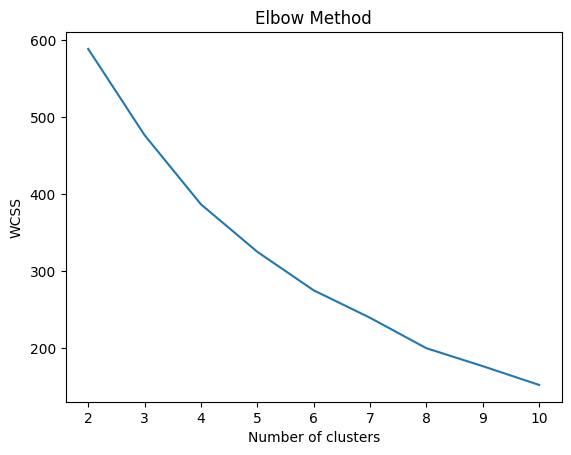

In [130]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled_age_annual_income)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

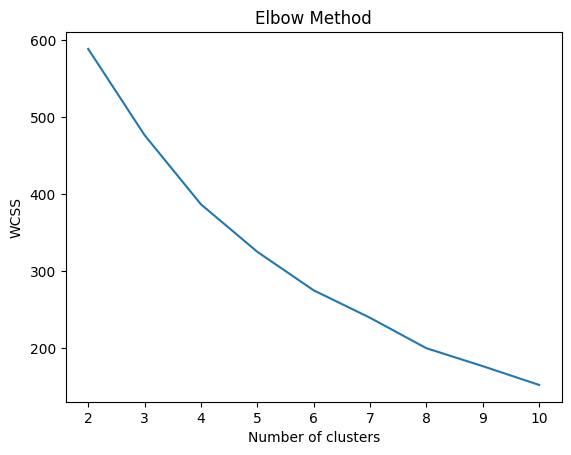

In [131]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled_age_spending_score)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  588.802677
1                   3  476.787554
2                   4  386.828426
3                   5  325.094980
4                   6  275.030671
5                   7  239.327862
6                   8  199.750461
7                   9  176.419096
8                  10  152.029834


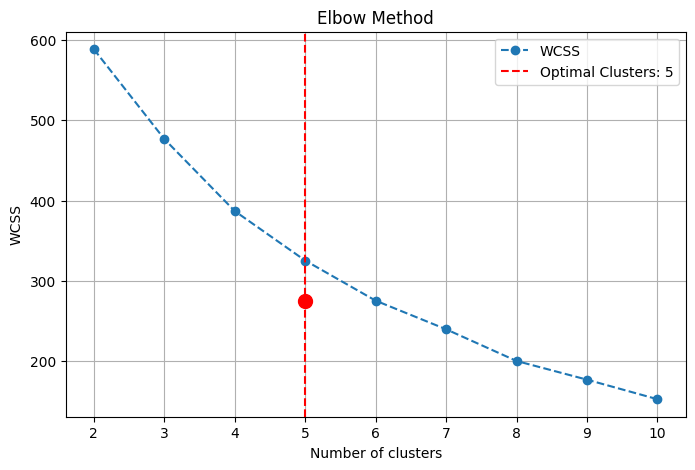

In [133]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 5


# **Modeling with K-Means**

## **Fit K-Means**

In [135]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,0,19,15,39,4
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,1
4,1,31,17,40,1


## **Clusters Visualization**

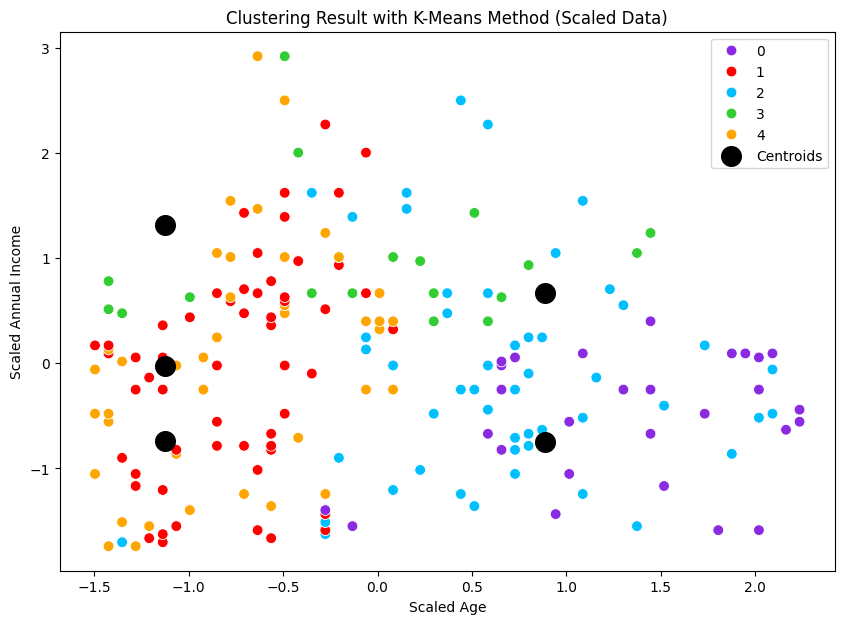

In [136]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "limegreen", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

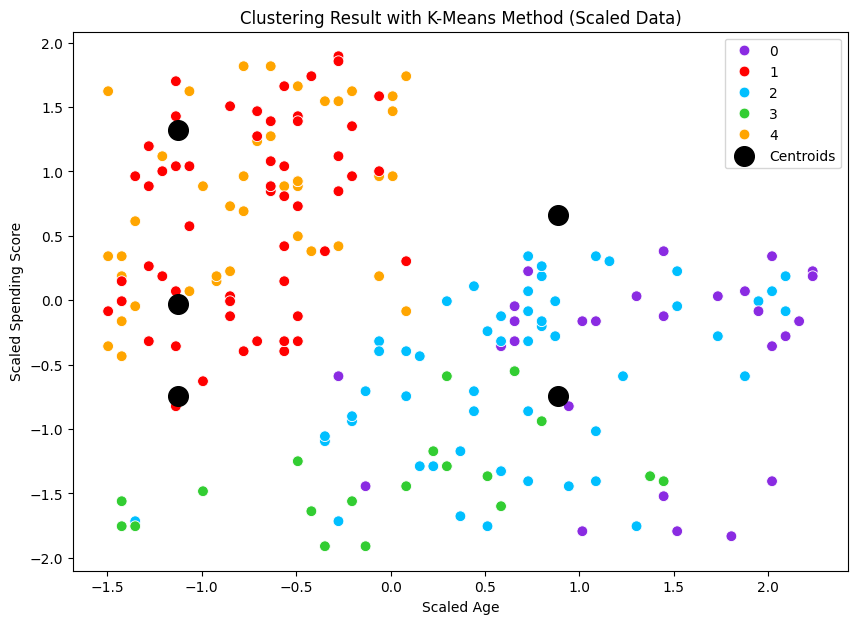

In [137]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "limegreen", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

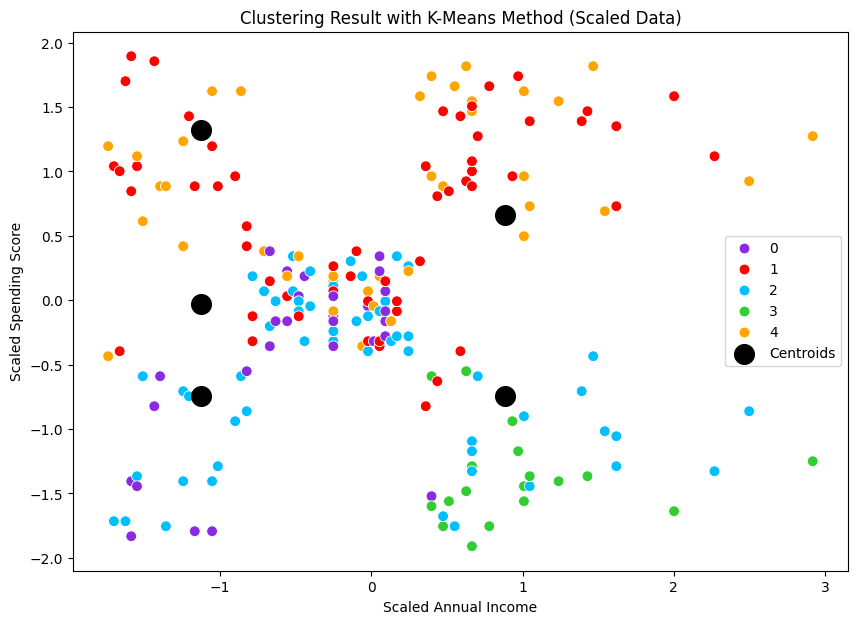

In [138]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "limegreen", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

# **Cluster Profiling & Insights**

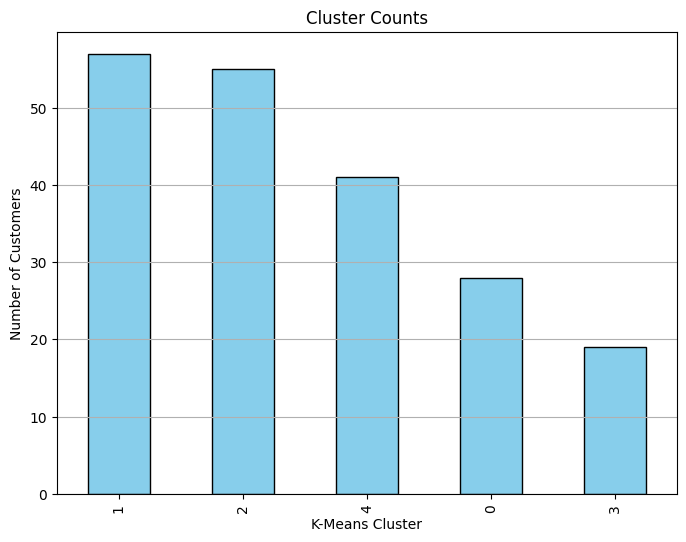

In [139]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [144]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max']
})

# Calculate the mode for the 'Gender' column separately
gender_mode = df.groupby('KMeans_Cluster')['Gender'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Add the gender mode to the cluster_summary DataFrame
cluster_summary[('Gender', 'mode')] = gender_mode

# Reorder columns to place Gender mode first
cols = cluster_summary.columns.tolist()
cols = [cols[-1]] + cols[:-1]
cluster_summary = cluster_summary[cols]


cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Gender        Age         Annual Income           \
                 mode       mean min max          mean min  max   
KMeans_cluster                                                    
0                   0  57.214286  35  70     46.785714  19   71   
1                   1  28.438596  18  40     59.666667  16  120   
2                   1  48.109091  20  68     58.818182  16  126   
3                   0  38.473684  19  59     85.894737  71  137   
4                   0  28.536585  18  40     61.804878  15  137   

               Spending Score          
                         mean min max  
KMeans_cluster                         
0                   38.714286   3  60  
1                   67.684211  29  99  
2                   34.781818   5  59  
3                   14.210526   1  36  
4                   71.097561  39  97

## **Profiling & Managerial Implications**

**Cluster 0 = Mature Value Seekers**

Profile:
*   Gender Majority: Male (mode = 0)
*   Age: Older group (mean ≈ 57 years)
*   Income Level: Moderate (mean ≈ $46.8k)
*   Spending Score: Moderate (≈ 39)

Implications:

*   Targeting: Value-conscious mature customers
*   Campaign Channels: Traditional media, loyalty emails, mall newsletters
*   Pricing/Offer Design: Discounts on practical or high-utility products (e.g., household, lifestyle)
*   Retention Ideas: Membership benefits, loyalty points, comfort-oriented experience

**Cluster 1 = Young Premium Shoppers**

Profile:

*   Gender Majority: Female (mode = 1)
*   Age: Young adults (mean ≈ 28 years)
*   Income Level: Mid-to-high (mean ≈ $59.7k)
*   Spending Score: High (≈ 68)

Implications:

*   Targeting: Premium and aspirational shoppers
*   Campaign Channels: Social media, influencer marketing, digital ads
*   Pricing/Offer Design: Trendy and lifestyle-based premium offers, bundles
*   Retention Ideas: Early access to new collections, brand ambassador programs

**Cluster 2 = Cautious Mid-Lifers**

Profile:

*   Gender Majority: Female (mode = 1)
*   Age: Middle-aged (mean ≈ 48 years)
*   Income Level: Mid-to-high (≈ $58.8k)
*   Spending Score: Low (≈ 35)

Implications:

*   Targeting: Financially stable but cautious spenders
*   Campaign Channels: Email, personalized offers, mall loyalty app
*   Pricing/Offer Design: Value deals, targeted coupons to encourage higher spend
*   Retention Ideas: Exclusive value programs, convenience-based perks (parking, priority billing)

**Cluster 3 = Affluent Minimalists**

Profile:

*   Gender Majority: Male (mode = 0)
*   Age: Middle-aged (≈ 38 years)
*   Income Level: High (≈ $85.9k)
*   Spending Score: Very Low (≈ 14)

Implications:

*   Targeting: High-income but low-engagement customers
*   Campaign Channels: Corporate partnerships, premium lifestyle collaborations
*   Pricing/Offer Design: Premium experience-based offerings, luxury add-ons
*   Retention Ideas: VIP services, personalized concierge experiences to increase mall time

**Cluster 4 = Young High Spenders**

Profile:

*   Gender Majority: Male (mode = 0)
*   Age: Young (≈ 28 years)
*   Income Level: Mid-to-high (≈ $61.8k)
*   Spending Score: Very High (≈ 71)

Implications:

*   Targeting: Premium young spenders, trend-oriented customers
*   Campaign Channels: Social media, mobile apps, influencer tie-ups
*   Pricing/Offer Design: Limited-time offers, trendy premium products
*   Retention Ideas: Gamified loyalty programs, exclusive event invites, early product access